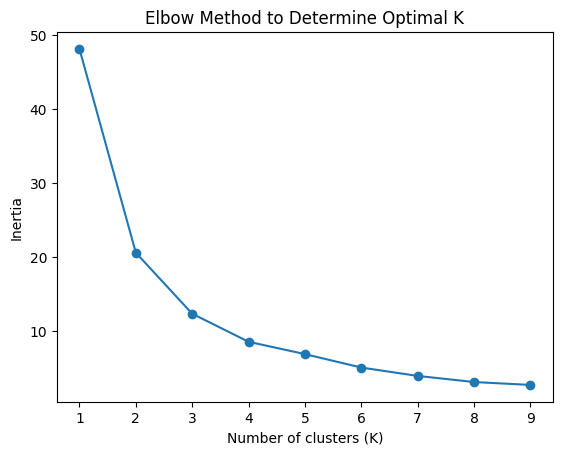

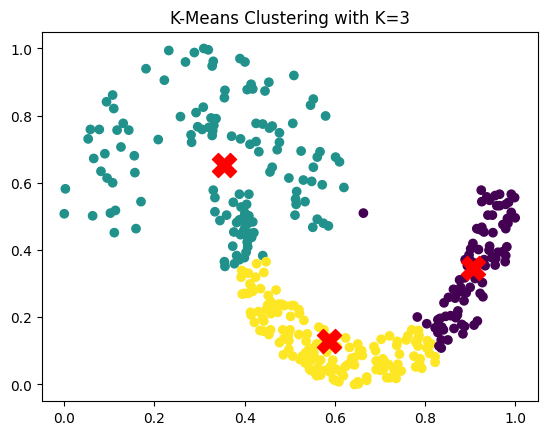

In [3]:

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('dataset.txt')


def initialize_centroids(data, K):

    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    return centroids
def assign_clusters(data, centroids):

    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels
def recalculate_centroids(data, cluster_labels, K):

    centroids = np.array([data[cluster_labels == k].mean(axis=0) for k in range(K)])
    return centroids

def k_means(data, K, max_iters=100):

    centroids = initialize_centroids(data, K)

    for i in range(max_iters):

        cluster_labels = assign_clusters(data, centroids)


        new_centroids = recalculate_centroids(data, cluster_labels, K)


        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return cluster_labels, centroids


def calculate_inertia(data, cluster_labels, centroids):
    inertia = 0
    for i, centroid in enumerate(centroids):
        inertia += np.sum((data[cluster_labels == i] - centroid) ** 2)
    return inertia


inertias = []
K_values = range(1, 10)

for K in K_values:
    cluster_labels, centroids = k_means(data, K)
    inertia = calculate_inertia(data, cluster_labels, centroids)
    inertias.append(inertia)


plt.plot(K_values, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()



optimal_K = 3
cluster_labels, centroids = k_means(data, optimal_K)


plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title(f'K-Means Clustering with K={optimal_K}')
plt.show()

